In [115]:
import numpy as np
import pandas as pd

In [116]:
df = pd.read_csv('housing.data',delim_whitespace=True,header=None)

In [117]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $ 10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [118]:
col_name=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [119]:
df.columns = col_name

In [120]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


# Exploratory Data Analysis (EDA)

In [121]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

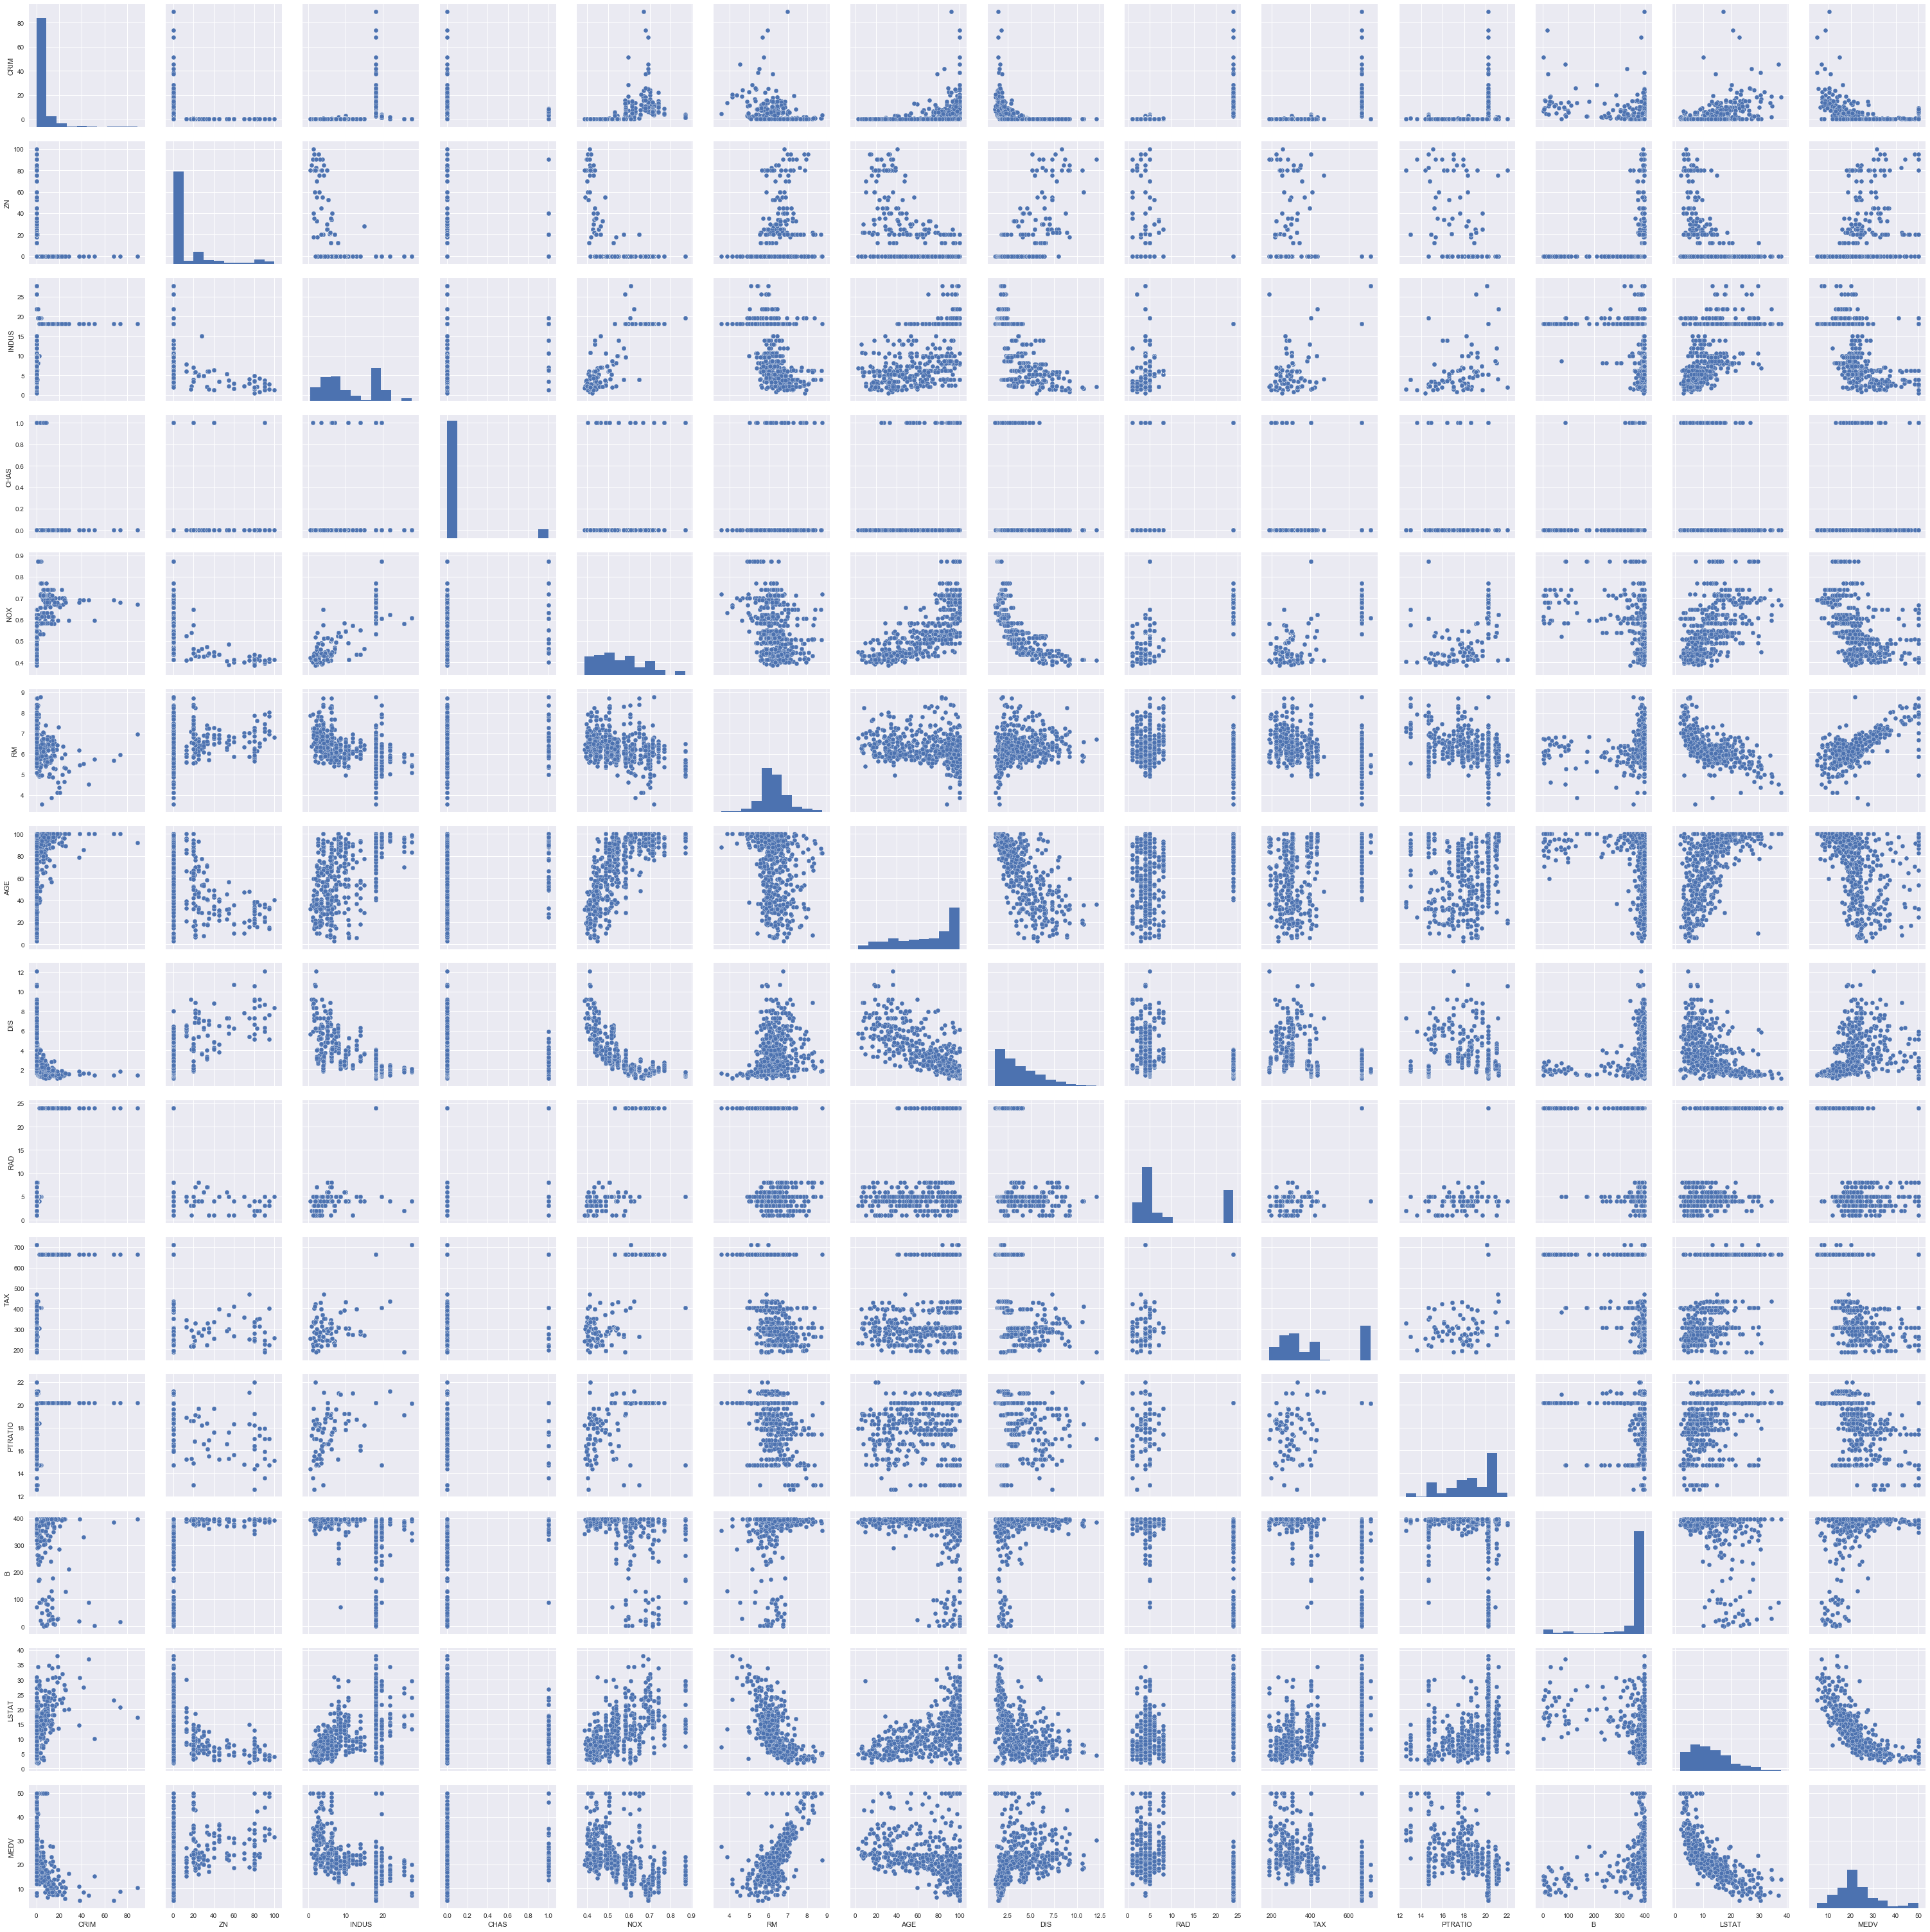

In [123]:
sns.pairplot(df,size=3)
plt.show()

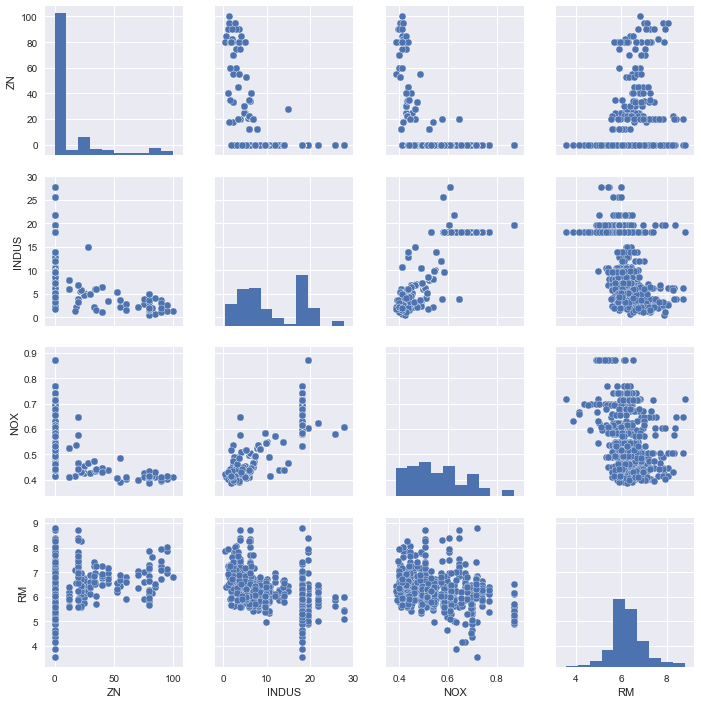

In [124]:
col_study = ['ZN','INDUS','NOX','RM']
sns.pairplot(df[col_study],size=2.5)
plt.show()

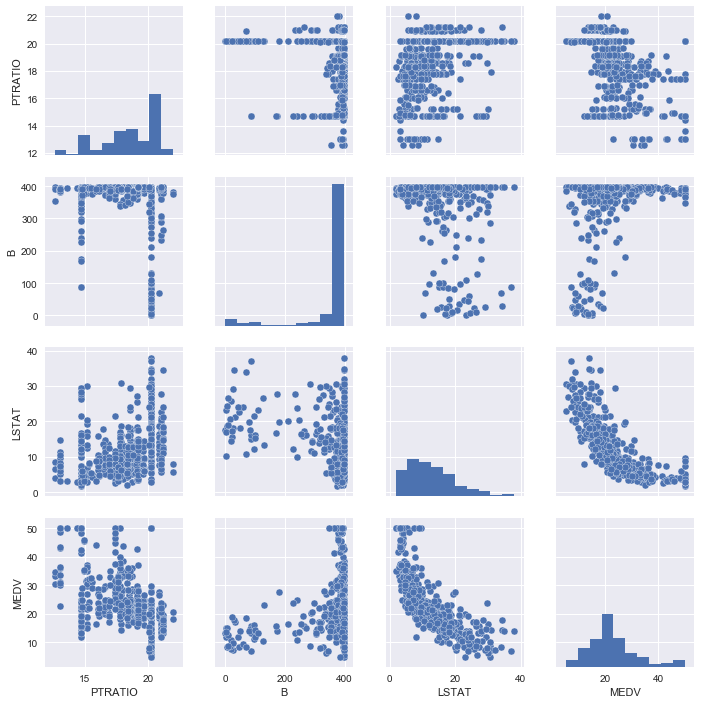

In [125]:
col_study = ['PTRATIO','B','LSTAT','MEDV']
sns.pairplot(df[col_study],size=2.5)
plt.show()

# Correlation Analysis and Feature Selection

In [126]:
pd.options.display.float_format = ' {:,.3f}'.format

In [127]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

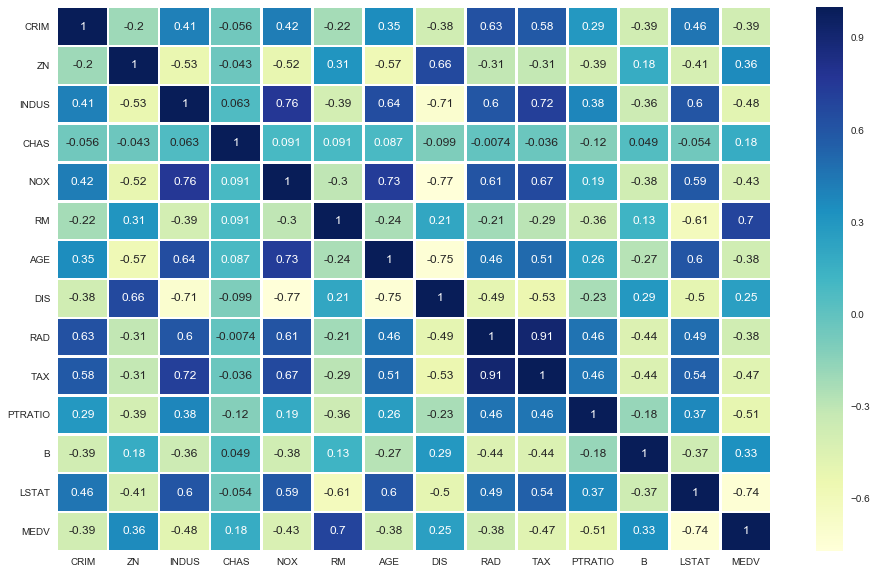

In [128]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linewidths=1.5)
plt.show()

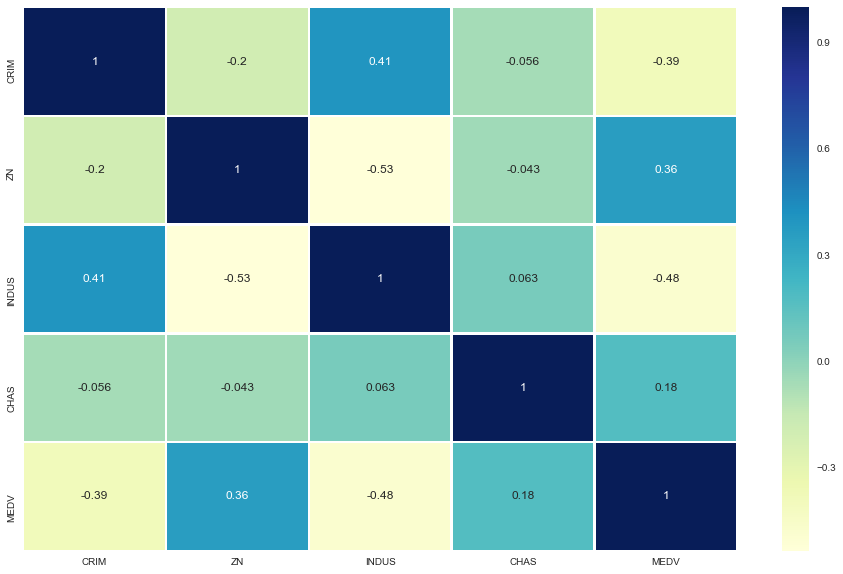

In [129]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['CRIM','ZN','INDUS','CHAS','MEDV']].corr(),annot=True,cmap="YlGnBu",linewidths=1.5)
plt.show()

# Linear regression with Scikit-Learn

In [130]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [131]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()

In [132]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
model.coef_

array([9.10210898])

In [134]:
model.intercept_

-34.67062077643857

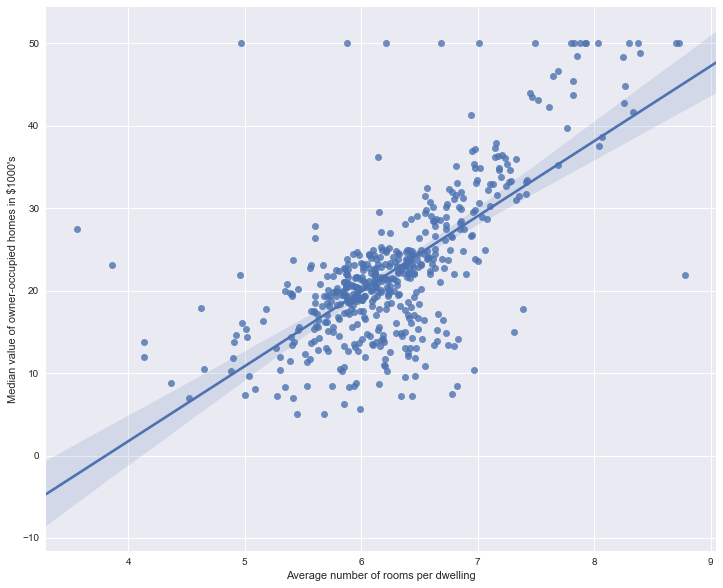

In [135]:
plt.figure(figsize=(12,10))
sns.regplot(X,y)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.show()

C:\Users\s\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\s\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


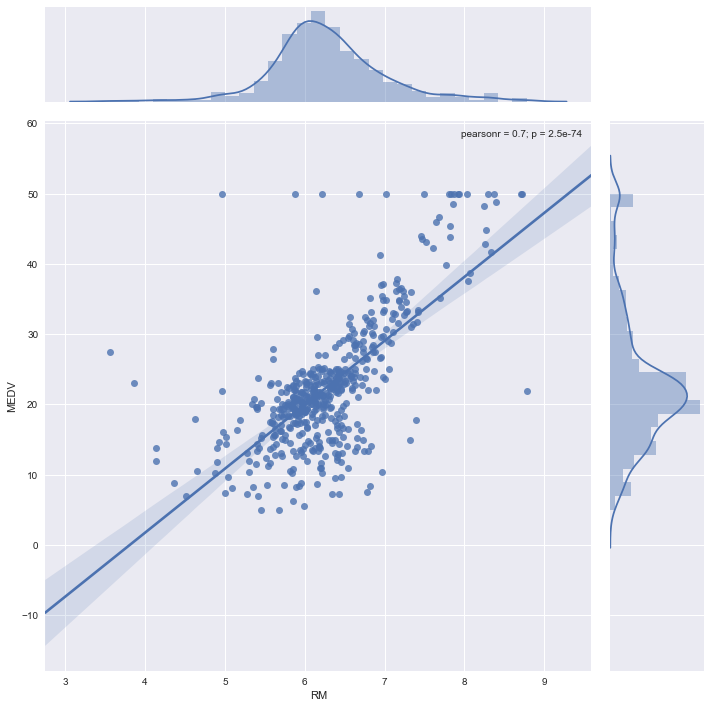

In [136]:
sns.jointplot(x='RM', y='MEDV',data=df,kind='reg',size=10)
plt.show()

In [137]:
x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values 

In [138]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
model.coef_

array([-0.95004935])

In [140]:
model.intercept_

34.55384087938311

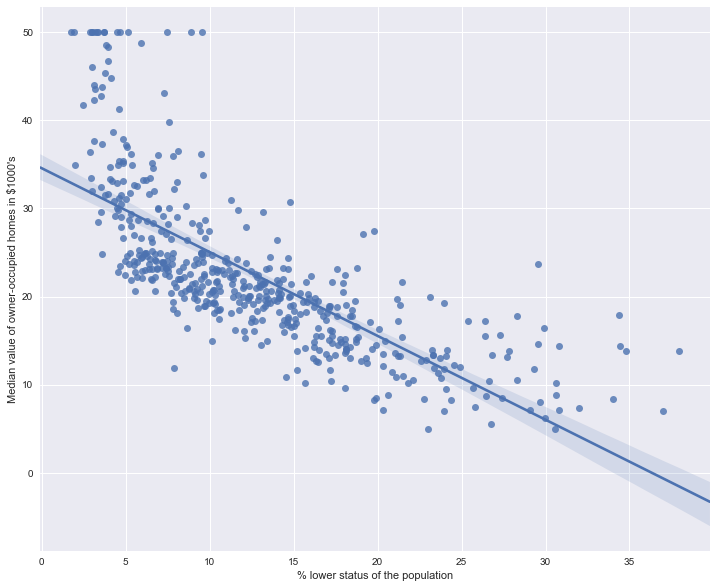

In [141]:
plt.figure(figsize=(12,10))
sns.regplot(x,y)
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.show()

C:\Users\s\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\s\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


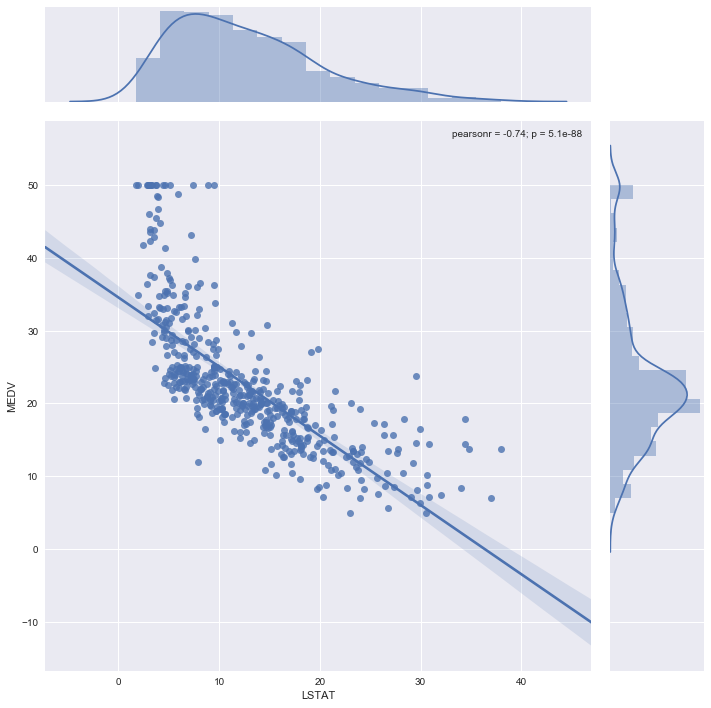

In [142]:
sns.jointplot(x='LSTAT', y='MEDV',data=df,kind='reg',size=10)
plt.show()

# RANdom SAmple Consensus (RANSAC) Algorithm

In [143]:
from sklearn.linear_model import RANSACRegressor

In [144]:
ransac=RANSACRegressor()

In [145]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [146]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [147]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [148]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [149]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))


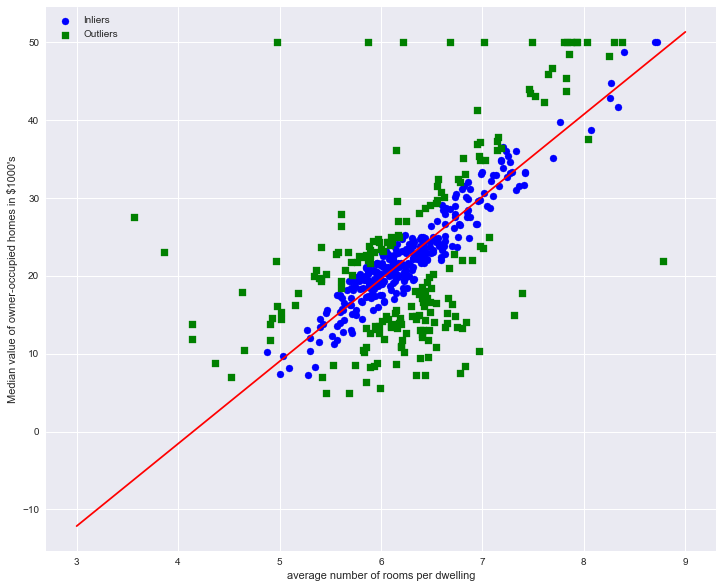

In [150]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='green', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [185]:
x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

In [186]:
ransac.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [153]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [154]:
line_X = np.arange(0,40,1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))


In [155]:
ransac.estimator_.coef_

array([-0.7114156])

In [156]:
ransac.estimator_.intercept_

28.5774263304692

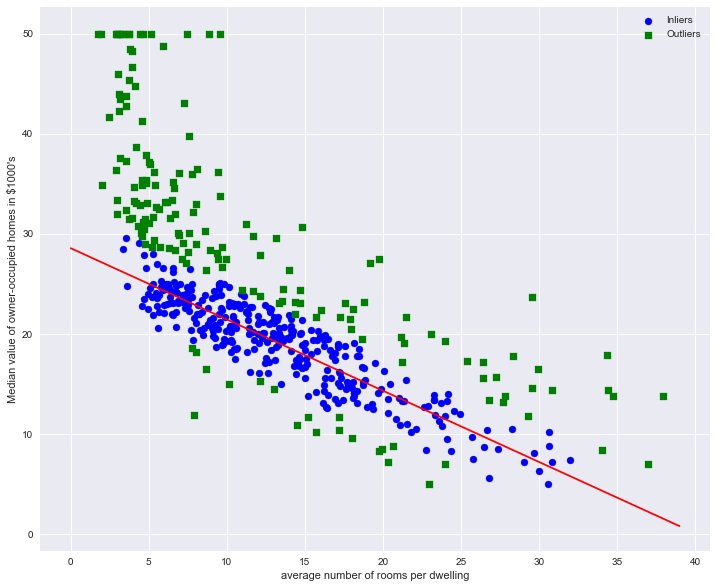

In [157]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(x[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask],
            c='green', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

# Performance Evaluation of Regression Model

In [206]:
from sklearn.model_selection import train_test_split
#X=df['LSTAT'].values.reshape(-1,1) # This line takes only the LSTAT data
X = df.iloc[:, :-1].values # This lines takes all columns of data
y=df['MEDV'].values

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [189]:
lr = LinearRegression()

In [190]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Method 1: Residual Analysis

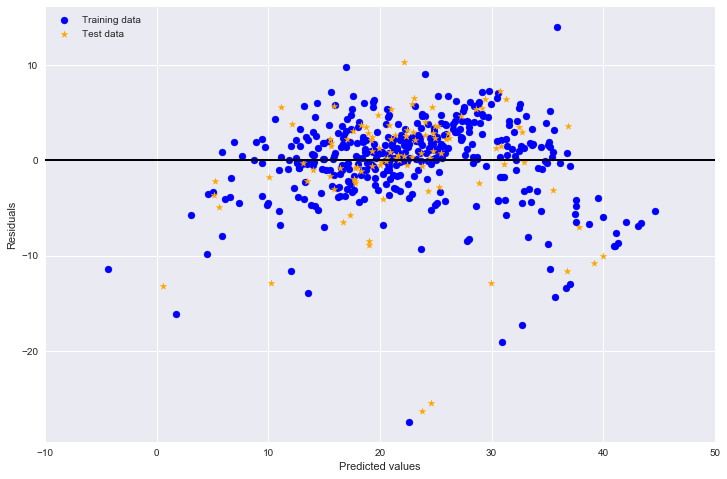

In [192]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])

plt.show()

# Method 2: Mean Squared Error (MSE) 

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$
 
* The average value of the Sums of Squared Error cost function

* Useful for comparing different regression models

* For tuning parameters via a grid search and cross-validation

In [193]:
from sklearn.metrics import mean_squared_error

In [194]:
mean_squared_error(y_train,y_train_pred)

19.32647020358573

In [195]:
mean_squared_error(y_test,y_test_pred)

33.44897999767649

# Method 3: Coefficient of determination, $R^2$

$$R^2=1-\frac{SSE}{SST}$$ 

* SSE: Sum of squared errors
* SST: Total Sum of squares

**It's value ranges between 0 and 1.**

**'1' value indicates totally perfect model and '0' indicates totally imperfect model**


In [196]:
from sklearn.metrics import r2_score

In [197]:
r2_score(y_train,y_train_pred)

0.7730135569264233

In [198]:
r2_score(y_test,y_test_pred)

0.5892223849182513

# What does a near perfect model looks like?

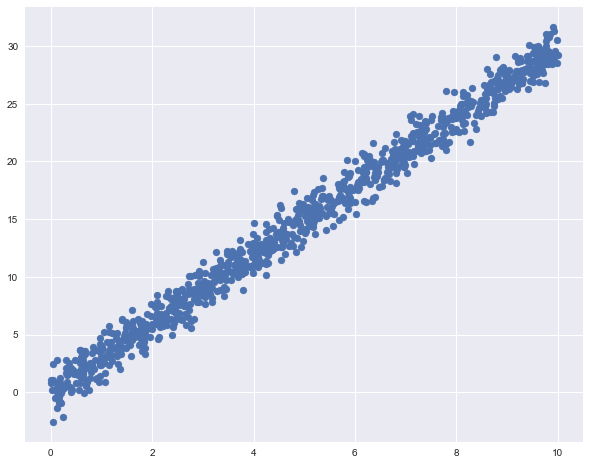

In [199]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()


In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1: Residual Analysis

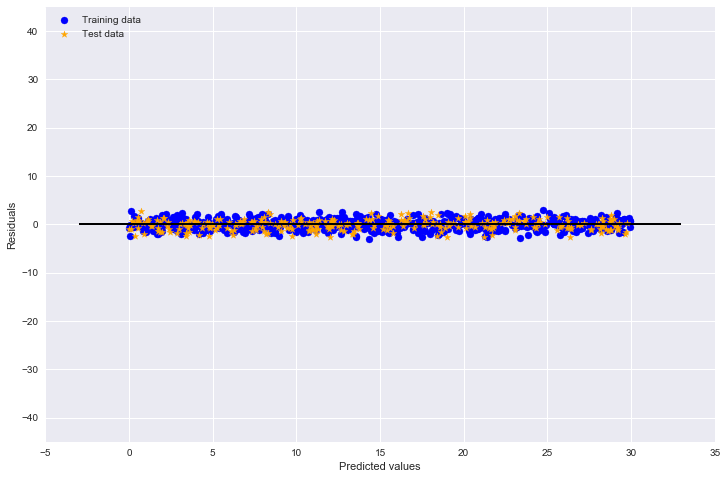

In [201]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-45, 45])
plt.show()

# Method 2: Mean Squared Error (MSE)

In [202]:
mean_squared_error(y_train, y_train_pred)

1.0379973841055672

In [203]:
mean_squared_error(y_test, y_test_pred)

1.136806110953489

# Method 3: Coefficient of Determination,  $R^2$

In [204]:
r2_score(y_train, y_train_pred)

0.9864232529749681

In [205]:
r2_score(y_test, y_test_pred)

0.9851648697519274